# Introduction to GeoPandas

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


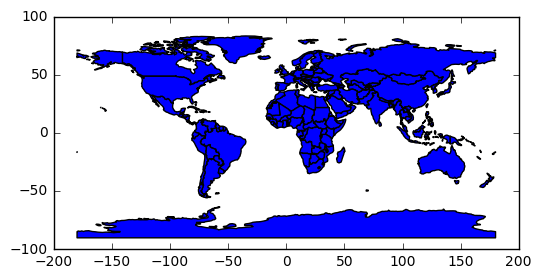

In [3]:
world.plot();

## Rename the column

In [4]:
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')
world.geometry.name

'borders'

In [5]:
world.crs

{'init': u'epsg:4326'}

In [62]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,borders
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [46]:
world.geometry

0      POLYGON ((61.21081709172574 35.65007233330923,...
1      (POLYGON ((16.32652835456705 -5.87747039146621...
2      POLYGON ((20.59024743010491 41.85540416113361,...
3      POLYGON ((51.57951867046327 24.24549713795111,...
4      (POLYGON ((-65.50000000000003 -55.199999999999...
5      POLYGON ((43.58274580259273 41.09214325618257,...
6      (POLYGON ((-59.57209469261153 -80.040178725096...
7      POLYGON ((68.935 -48.62500000000001, 69.58 -48...
8      (POLYGON ((145.3979781434948 -40.7925485166058...
9      POLYGON ((16.97966678230404 48.12349701597631,...
10     (POLYGON ((45.0019873390568 39.7400035670496, ...
11     POLYGON ((29.33999759290035 -4.499983412294092...
12     POLYGON ((3.314971144228537 51.34578095153609,...
13     POLYGON ((2.691701694356254 6.258817246928629,...
14     POLYGON ((-2.827496303712707 9.642460842319778...
15     POLYGON ((92.67272098182556 22.04123891854125,...
16     POLYGON ((22.65714969248299 44.23492300066128,...
17     (POLYGON ((-77.534659999

df.geometry will be still default on 'borders':

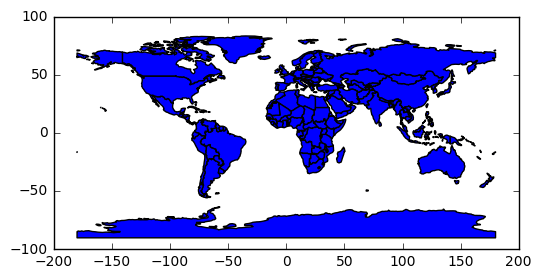

In [6]:
world.plot();

In [7]:
america = world[(world.continent == 'North America') & (world.pop_est > 14650054.0)]
america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,borders
27,33487208.0,North America,Canada,CAN,1300000.0,(POLYGON ((-63.66449999999998 46.5500099999999...
102,111211789.0,North America,Mexico,MEX,1563000.0,"POLYGON ((-97.14000830767071 25.8699974634784,..."
168,313973000.0,North America,United States,USA,15094000.0,"(POLYGON ((-155.54211 19.08348000000001, -155...."


## Create a column calculated from dataframe

In [8]:
america['gdp_per_cap'] = america.gdp_md_est/america.pop_est

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,borders,gdp_per_cap
27,33487208.0,North America,Canada,CAN,1300000.0,(POLYGON ((-63.66449999999998 46.5500099999999...,0.038821
102,111211789.0,North America,Mexico,MEX,1563000.0,"POLYGON ((-97.14000830767071 25.8699974634784,...",0.014054
168,313973000.0,North America,United States,USA,15094000.0,"(POLYGON ((-155.54211 19.08348000000001, -155....",0.048074


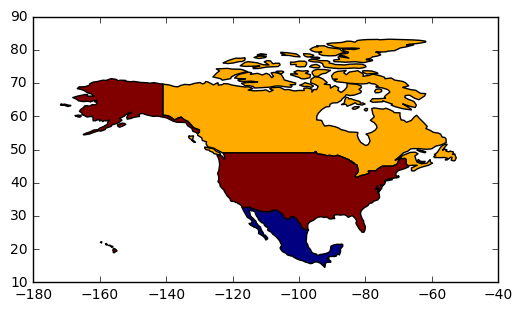

In [11]:
america.plot(column='gdp_per_cap');

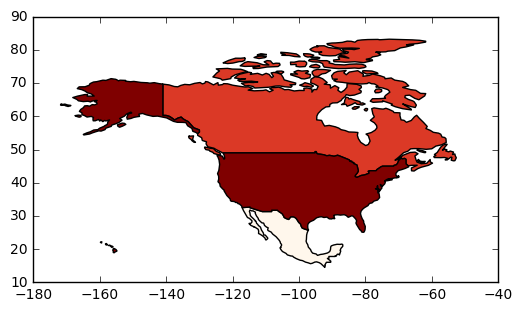

In [12]:
 america.plot(column='gdp_per_cap', cmap='OrRd');

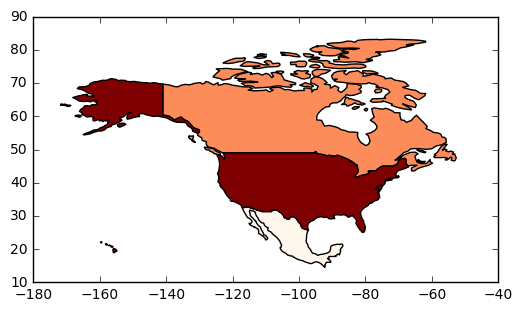

In [13]:
america.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');

## Multilayer Geovisualization

### Country map

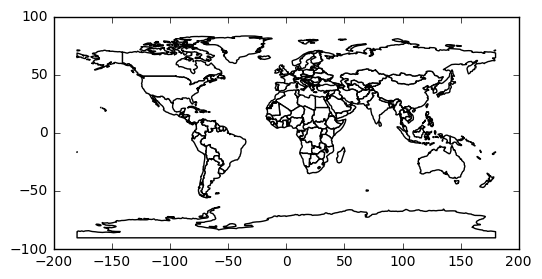

In [14]:
world.plot(color='white', edgecolor='black');

### Country map + Captials

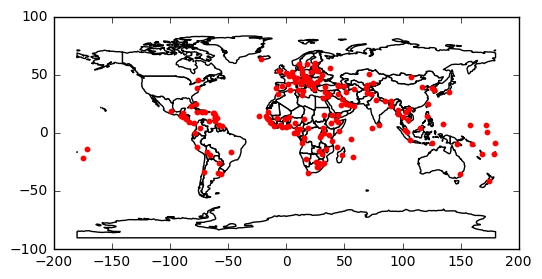

In [39]:
base = world.plot(color='white', edgecolor='black')
cities.plot(ax=base, marker='o', color='red', markersize=10);

## Another example: GDP per cap in China Neighboring Countries

In [15]:
world['gdp_per_cap'] = world.gdp_md_est/world.pop_est

In [16]:
china = world[world.name =='China'][['borders', 'name', 'gdp_per_cap']]
china.head()

,borders,name,gdp_per_cap
30,(POLYGON ((110.3391878601516 18.67839508714761...,China,0.005956


In [17]:
countries = world[world.name !='China'][['borders', 'name', 'gdp_per_cap']]
countries.head()

,borders,name,gdp_per_cap
0,"POLYGON ((61.21081709172574 35.65007233330923,...",Afghanistan,0.000784
1,(POLYGON ((16.32652835456705 -5.87747039146621...,Angola,0.008618
2,"POLYGON ((20.59024743010491 41.85540416113361,...",Albania,0.005993
3,"POLYGON ((51.57951867046327 24.24549713795111,...",United Arab Emirates,0.038408
4,(POLYGON ((-65.50000000000003 -55.199999999999...,Argentina,0.014027


In [18]:
len(world)

177

In [19]:
china_neighbor = gpd.sjoin(countries, china, how='inner', op='intersects')
print len(china_neighbor), type(china_neighbor)
china_neighbor.head()

13 <class 'geopandas.geodataframe.GeoDataFrame'>


,borders,name_left,gdp_per_cap_left,index_right,name_right,gdp_per_cap_right
0,"POLYGON ((61.21081709172574 35.65007233330923,...",Afghanistan,0.000784,30,China,0.005956
24,"POLYGON ((91.69665652869668 27.77174184825166,...",Bhutan,0.005099,30,China,0.005956
73,"POLYGON ((77.83745079947457 35.49400950778777,...",India,0.002827,30,China,0.005956
83,"POLYGON ((70.96231489449929 42.26615428320554,...",Kazakhstan,0.011416,30,China,0.005956
85,"POLYGON ((70.96231489449914 42.26615428320549,...",Kyrgyzstan,0.002137,30,China,0.005956


### GDP per cap Geovisualization of China Neighboring countries

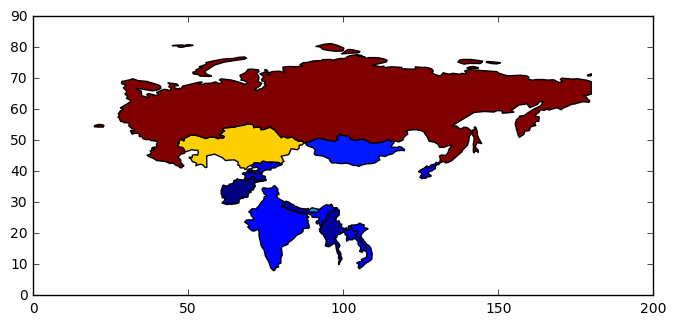

In [20]:
fig, ax = plt.subplots(figsize=(8,20))
ax.set_aspect('equal')
china_neighbor.plot(ax=ax, column='gdp_per_cap_left')
plt.xlim(0,)
plt.show();

In [199]:
china = china.rename(columns={"gdp_per_cap": "gdp_per_cap_left", "name": "name_left"})

In [207]:
type(china)

geopandas.geodataframe.GeoDataFrame

In [21]:
asia = gpd.GeoDataFrame(pd.concat([china_neighbor, china], ignore_index=True))
asia.head(14)

,borders,gdp_per_cap,gdp_per_cap_left,gdp_per_cap_right,index_right,name,name_left,name_right
0,"POLYGON ((61.21081709172574 35.65007233330923,...",NaN,0.000784,0.005956,30.0,NaN,Afghanistan,China
1,"POLYGON ((91.69665652869668 27.77174184825166,...",NaN,0.005099,0.005956,30.0,NaN,Bhutan,China
2,"POLYGON ((77.83745079947457 35.49400950778777,...",NaN,0.002827,0.005956,30.0,NaN,India,China
3,"POLYGON ((70.96231489449929 42.26615428320554,...",NaN,0.011416,0.005956,30.0,NaN,Kazakhstan,China
4,"POLYGON ((70.96231489449914 42.26615428320549,...",NaN,0.002137,0.005956,30.0,NaN,Kyrgyzstan,China
5,"POLYGON ((105.2187768900789 14.27321177821069,...",NaN,0.002045,0.005956,30.0,NaN,Lao PDR,China
6,"POLYGON ((99.54330936075931 20.18659760180206,...",NaN,0.001145,0.005956,30.0,NaN,Myanmar,China
7,"POLYGON ((87.75126427607671 49.29719798440549,...",NaN,0.003116,0.005956,30.0,NaN,Mongolia,China
8,"POLYGON ((88.12044070836987 27.87654165293959,...",NaN,0.001088,0.005956,30.0,NaN,Nepal,China
9,"POLYGON ((130.6400159038524 42.39500946712528,...",NaN,0.001765,0.005956,30.0,NaN,Dem. Rep. Korea,China


In [22]:
type(asia), asia.borders

(geopandas.geodataframe.GeoDataFrame,
 0     POLYGON ((61.21081709172574 35.65007233330923,...
 1     POLYGON ((91.69665652869668 27.77174184825166,...
 2     POLYGON ((77.83745079947457 35.49400950778777,...
 3     POLYGON ((70.96231489449929 42.26615428320554,...
 4     POLYGON ((70.96231489449914 42.26615428320549,...
 5     POLYGON ((105.2187768900789 14.27321177821069,...
 6     POLYGON ((99.54330936075931 20.18659760180206,...
 7     POLYGON ((87.75126427607671 49.29719798440549,...
 8     POLYGON ((88.12044070836987 27.87654165293959,...
 9     POLYGON ((130.6400159038524 42.39500946712528,...
 10    (POLYGON ((143.6480074403629 50.74760040954152...
 11    POLYGON ((71.01419803252017 40.24436554621823,...
 12    POLYGON ((108.0501802917829 21.55237986906012,...
 13    (POLYGON ((110.3391878601516 18.67839508714761...
 Name: borders, dtype: object)

In [23]:
print type(world['borders'][0])

<class 'shapely.geometry.polygon.Polygon'>


#### Without assigning geometry for GeoDataFrame, we are unable to plot and make any geospatial operation:

In [219]:
asia.geometry

AttributeError: No geometry data set yet (expected in column 'geometry'.

In [24]:
asia.geometry = asia.borders ## always need to assign geometry after merge or data manuplication

//anaconda/lib/python2.7/site-packages/geopandas/plotting.py:381: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


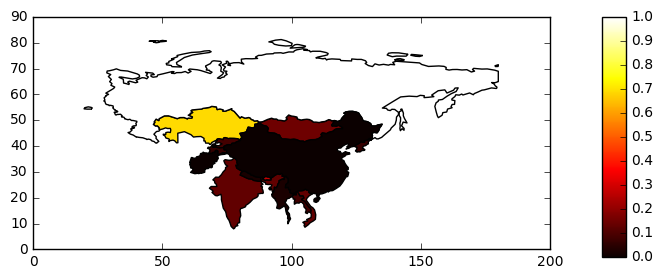

In [25]:
ax = asia.plot(column='gdp_per_cap_left', colormap='hot', figsize=(8,3))

fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='hot')
ax.set_xlim(0,)
sm._A = []
fig.colorbar(sm, cax=cax)
plt.show();